In [7]:
!pip install seaborn
!pip install xlrd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: C:\Users\Eigenaar\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: C:\Users\Eigenaar\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [8]:
#Sla de excel op als een csv

# Read the Excel file using xlrd
df = pd.read_excel("../data/titanic3.xls")
df = pd.get_dummies(df, columns=['sex'], prefix=['sex'])
df.head()

,pclass,survived,name,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,sex_female,sex_male
0,1,1,"Allen, Miss. Elisabeth Walton",29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1,0
1,1,1,"Allison, Master. Hudson Trevor",0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",0,1
2,1,0,"Allison, Miss. Helen Loraine",2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1,0


Perform data preprocessing, which includes handling missing values, converting categorical features to numerical, and feature scaling.

In [9]:
sub_df = df.groupby('sex')
df.head()
#df.dtypes
#df.age.value_counts
#df.body.value_counts
#df.survived.value_counts
#sub_df.head()
#sub_df.sex.value_counts

KeyError: 'sex'

In [10]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body,sex_female,sex_male
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000,1309.000000,1309.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917,0.355997,0.644003
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922,0.478997,0.478997
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000,0.000000,0.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000,0.000000,1.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000,1.000000,1.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000,1.000000,1.000000


In [11]:
# Ceil the values in the "Age" column
df['age'] = np.ceil(df['age']).copy()

# Display the modified DataFrame
print(df)

#Geen idee wa ik met de NaN moet aanvangen bij age

      pclass  survived                                             name   age  \
0          1         1                    Allen, Miss. Elisabeth Walton  29.0   
1          1         1                   Allison, Master. Hudson Trevor   1.0   
2          1         0                     Allison, Miss. Helen Loraine   2.0   
3          1         0             Allison, Mr. Hudson Joshua Creighton  30.0   
4          1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  25.0   
...      ...       ...                                              ...   ...   
1304       3         0                             Zabour, Miss. Hileni  15.0   
1305       3         0                            Zabour, Miss. Thamine   NaN   
1306       3         0                        Zakarian, Mr. Mapriededer  27.0   
1307       3         0                              Zakarian, Mr. Ortin  27.0   
1308       3         0                               Zimmerman, Mr. Leo  29.0   

      sibsp  parch  ticket 

Hoe vervangen we NaN in body en in boat? Want boat is volgens mij de nummer van de boot waar ze opzitten en body kan in principe vervangen worden door avg maar hoe beinvloed da het model?

Vanaf nu komen de selecties

1. Target Variable:

 * "Survived" will be your target variable, as you want to predict survival. 
 
2. Predictor Variables (Features):

* "Pclass": The passenger class can be an important predictor. Higher classes may have had a higher priority for lifeboats.
* "Sex": Gender could be a significant factor as well, as women and children were given priority during the evacuation.
* "Age": Age may be important, as children and the elderly might have had different survival rates.
* "SibSp" (Number of Siblings/Spouses Aboard): This might provide insights into family groups.
* "Parch" (Number of Parents/Children Aboard): This might provide insights into family groups.
* "Fare": Fare paid may also be related to passenger class and could be indicative of socio-economic status.
* "Embarked": The port of embarkation may not be directly related to survival but could have some indirect effects.


3. Irrelevant Variables:

* "Name": Passenger names are unlikely to be directly related to survival.
* "Ticket": Ticket numbers are unlikely to be directly related to survival.
* "Cabin": Cabin numbers might contain information, but there are many missing values, and it can be challenging to extract meaningful patterns.
* "Boat" and "Body": These columns appear to contain post-incident information and are unlikely to be predictive.
* "Home Dest": Passenger's home destinations may not be directly related to survival.

In [12]:
# Select relevant columns
selected_columns = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'survived']

# Create a new DataFrame with only the selected columns
titanic_df = df[selected_columns]

# Now, 'titanic_df' contains only the relevant columns for your analysis
print(titanic_df)

KeyError: "['sex'] not in index"

In [13]:
df.head()
#df['Sex'] = df['Sex'].apply(lambda x: 0 if str(x) == 'male' else 1 if str(x) == 'female' else x)

,pclass,survived,name,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,sex_female,sex_male
0,1,1,"Allen, Miss. Elisabeth Walton",29.0,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1,0
1,1,1,"Allison, Master. Hudson Trevor",1.0,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",0,1
2,1,0,"Allison, Miss. Helen Loraine",2.0,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",30.0,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",25.0,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1,0


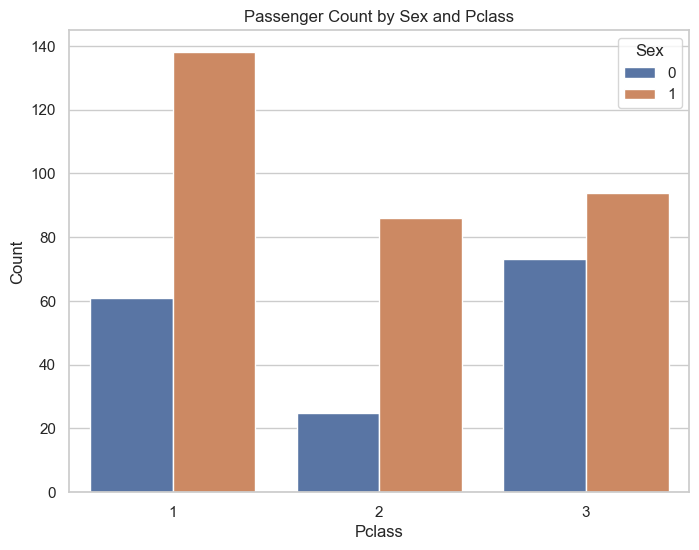

In [20]:

survived_data = df[df['survived'] == 1]
# Set the style of the plot (optional)
sns.set(style="whitegrid")

# Create a bar chart
plt.figure(figsize=(8, 6))  # Optional: Set the figure size

# Use Seaborn to create a bar chart
sns.countplot(data=survived_data, x='pclass', hue='sex_female')

plt.title('Passenger Count by Sex and Pclass')  # Set the title
plt.xlabel('Pclass')  # Set the x-axis label (Passenger Class)
plt.ylabel('Count')   # Set the y-axis label (Count)

# Add a legend to distinguish between male and female
plt.legend(title='Sex', loc='upper right')

plt.show()  # Display the plot

In [21]:

# Convert 'boat' column to strings

# Assuming you have a DataFrame named 'df' with your data
# Example: Create a pivot table to count passengers by class and boat
pivot_table = pd.pivot_table(survived_data, values='name', index='pclass', columns='boat', aggfunc='count', fill_value=0)

# Display the pivot table
print(pivot_table)

# Sum the values along the columns (boats) axis
total_passengers_by_class = pivot_table.sum(axis=1)

# Display the total count of passengers by class
print(total_passengers_by_class)

# Sum the values along the rows (passenger classes) axis
total_passengers_per_boat = pivot_table.sum(axis=0)

# Display the total count of passengers per boat
print(total_passengers_per_boat)

boat    2  1  10  11  12  13  13 15  13 15 B  14  15  ...   6   7   8  8 10  \
pclass                                                ...                     
1       1  5   8   6   0   1      0        0   4   1  ...  19  22  23     1   
2       0  0  15  14  16  12      0        0  23   1  ...   0   1   0     0   
3       0  0   6   5   2  26      2        1   5  35  ...   1   0   0     0   

boat     9  A  B   C  C D  D  
pclass                        
1        6  2  3   2    0  9  
2       16  0  1   0    0  2  
3        3  5  4  35    2  8  

[3 rows x 28 columns]
pclass
1    199
2    111
3    167
dtype: int64
boat
2           1
1           5
10         29
11         25
12         18
13         39
13 15       2
13 15 B     1
14         32
15         37
15 16       1
16         23
2          12
3          26
4          31
5          27
5 7         2
5 9         1
6          20
7          23
8          23
8 10        1
9          25
A           7
B           8
C          37
C D       

In [16]:
print(df['boat'])


0         2
1        11
2       NaN
3       NaN
4       NaN
       ... 
1304    NaN
1305    NaN
1306    NaN
1307    NaN
1308    NaN
Name: boat, Length: 1309, dtype: object


In [22]:
df_cleaned = df = survived_data[survived_data['boat'].notna()]
print(df_cleaned['boat'])

0           2
1          11
5           3
6          10
8           D
        ...  
1258        C
1260       15
1261       15
1277    13 15
1286        C
Name: boat, Length: 477, dtype: object


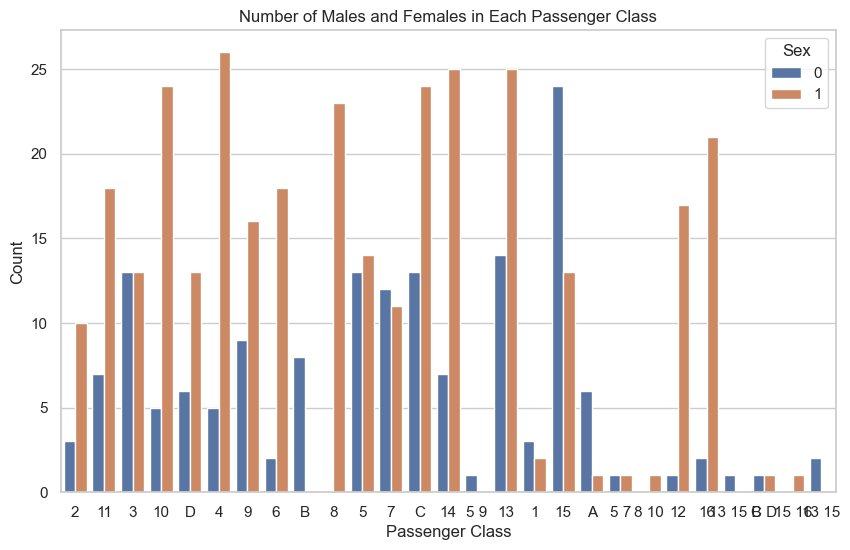

         Male  Female
boat                 
2           0       1
1           3       2
10          5      24
11          7      18
12          1      17
13         14      25
13 15       2       0
13 15 B     1       0
14          7      25
15         24      13
15 16       0       1
16          2      21
2           3       9
3          13      13
4           5      26
5          13      14
5 7         1       1
5 9         1       0
6           2      18
7          12      11
8           0      23
8 10        0       1
9           9      16
A           6       1
B           8       0
C          13      24
C D         1       1
D           6      13


In [23]:
# Create a countplot to show the number of males and females in each class

plt.figure(figsize=(10, 6))
sns.countplot(data=df_cleaned, x='boat', hue='sex_female')
plt.title('Number of Males and Females in Each Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Sex', loc='upper right')

plt.show()

# Create a contingency table (summary table) using pd.crosstab
summary_table = pd.crosstab(df_cleaned['boat'], df_cleaned['sex_female'])

# Rename the columns for clarity
summary_table.columns = ['Male', 'Female']

# Print the summary table
print(summary_table)

<Axes: >

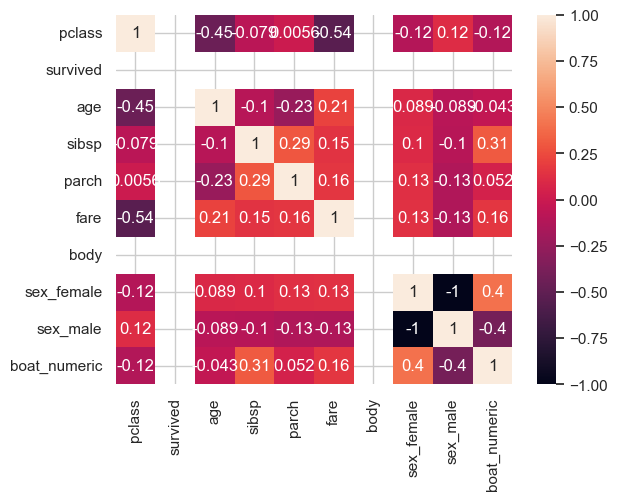

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = df_cleaned.corr(numeric_only=True)
sns.heatmap(corr, annot=True)

In [39]:
print(df_cleaned['parch'])

0       0
1       2
5       0
6       0
8       0
       ..
1258    2
1260    0
1261    0
1277    0
1286    0
Name: parch, Length: 477, dtype: int64


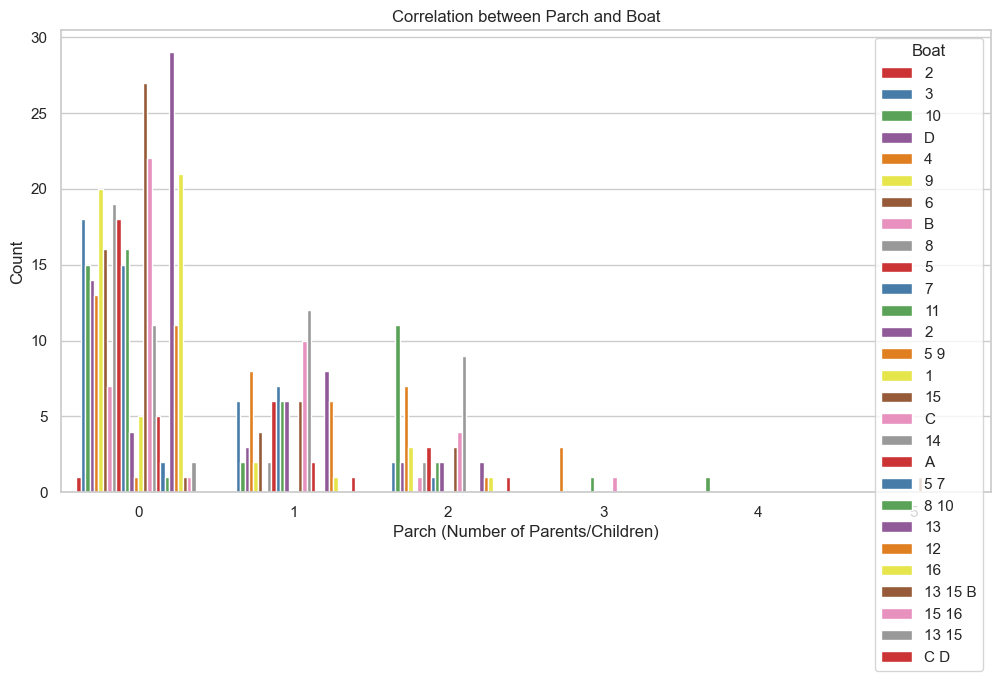

       boat  parch
14        4     31
8        14     30
2        10     28
25        C     21
9        15     17
3        11     13
5        13     12
15        5     12
13        3     10
12        2     10
19        7      9
4        12      8
22        9      8
27        D      7
20        8      6
18        6      4
11       16      3
26      C D      3
23        A      2
24        B      2
1         1      0
16      5 7      0
17      5 9      0
10    15 16      0
21     8 10      0
7   13 15 B      0
6     13 15      0
0         2      0


In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(data=df_cleaned, x='parch', hue='boat', palette='Set1')
plt.title('Correlation between Parch and Boat')
plt.xlabel('Parch (Number of Parents/Children)')
plt.ylabel('Count')
plt.legend(title='Boat', loc='upper right')
plt.show()

# Group the data by 'Boat' and calculate the sum of 'Parch' for each boat
summary_table = df_cleaned.groupby('boat')['parch'].sum().reset_index()

# Optionally, you can sort the summary table by 'Parch' values in descending order
summary_table = summary_table.sort_values(by='parch', ascending=False)

# Display the summary table
print(summary_table)

   pclass  parch
0       1     85
1       2     80
2       3     71


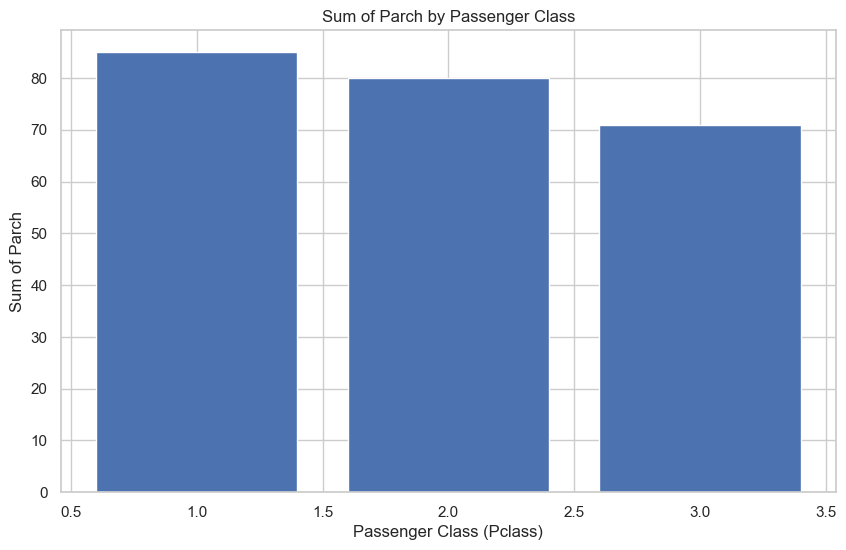

In [46]:
import matplotlib.pyplot as plt

# Group the data by 'Pclass' and calculate the sum of 'Parch' for each class
pclass_parch_summary = df_cleaned.groupby('pclass')['parch'].sum().reset_index()

# Display the summary table
print(pclass_parch_summary)

# Create a bar chart to visualize 'Pclass' vs. sum of 'Parch'
plt.figure(figsize=(10, 6))
plt.bar(pclass_parch_summary['pclass'], pclass_parch_summary['parch'])
plt.title('Sum of Parch by Passenger Class')
plt.xlabel('Passenger Class (Pclass)')
plt.ylabel('Sum of Parch')
plt.show()



   pclass        fare
0       1  19458.1420
1       2   2578.7459
2       3   2206.1580


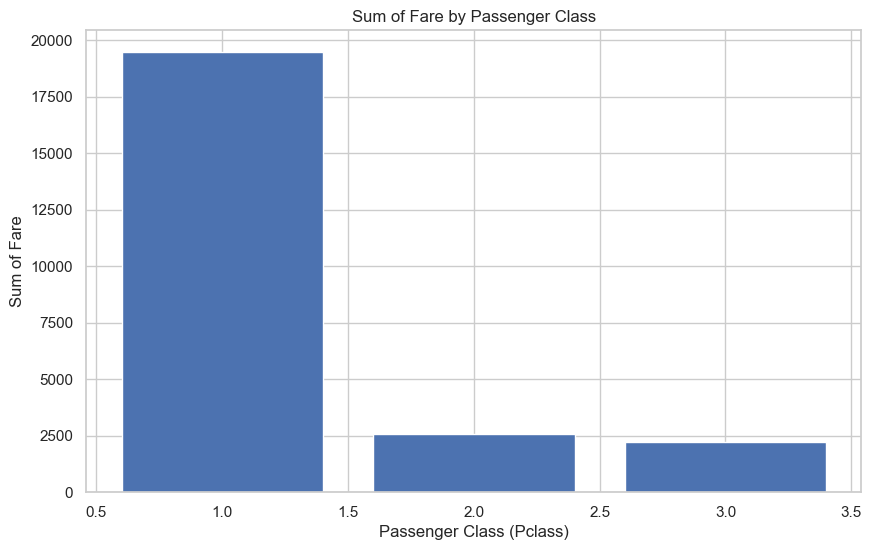

In [48]:
# Group the data by 'Pclass' and calculate the sum of 'Fare' for each class
pclass_fare_summary = df_cleaned.groupby('pclass')['fare'].sum().reset_index()

# Display the summary table
print(pclass_fare_summary)

# Create a bar chart to visualize 'Pclass' vs. sum of 'Fare'
plt.figure(figsize=(10, 6))
plt.bar(pclass_fare_summary['pclass'], pclass_fare_summary['fare'])
plt.title('Sum of Fare by Passenger Class')
plt.xlabel('Passenger Class (Pclass)')
plt.ylabel('Sum of Fare')
plt.show()